In [1]:
import dipy.segment.bundles as dsb
import nibabel as nib
import numpy as np
from dipy.io.streamline import load_tractogram, save_tractogram
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction_avg_loc_qb as rc
import os
import pickle
import networkx as nx
import visualization as vis
from mpl_toolkits.mplot3d import Axes3D
def graph_vis(G, node_loc, streamlines):
    # 3d spring layout
    pos = node_loc
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w",label = None)
    for i in range(len(streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
        ax.plot3D(xdata,ydata,zdata,color= '#bfbfbf', lw = 2);
    # Plot the nodes
    ax.scatter(*node_xyz.T, s=400, ec="w", color = 'r', zorder=100)
    edge_labels = nx.get_edge_attributes(G, "weight")
    # Plot the edges
    weight_labels = list(edge_labels.values())
    count = 0
    for vizedge in edge_xyz:
        wt = weight_labels[count]*5
        if wt == 10:
            ax.plot(*vizedge.T, color='g',
                    lw = wt,
                    zorder = 50,
                   label = str(weight_labels[count]))
        else:
            ax.plot(*vizedge.T, color='#000000',
                    lw = wt,
                    zorder = 50,
                   label = str(weight_labels[count]))
        count+=1


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    plt.axis("off")
    plt.legend()
#read streamlines and create combined_streamlines
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '0798q', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# sub_list = sub_list[:3]
# sub_list = ['', '1808u', '1043f', '0001a', '4662a', '1142k', '', '2027j', '3978i', '1145h', '3058s', '2211h', '', '', '0798q', '3571z', '4680i', '3832y', '1853b', '', '0097p', '', '', '']

In [ ]:
# loi = [0,4,9,12,19,20]
loi=[9,12,13,15,23,24]
sub_list1 = [sub_list[i] for i in range(len(sub_list)) if i  not in loi]
sub_list = sub_list1
print(sub_list)

In [ ]:
loi=[0,7,8,9,10,11,14]
sub_list1 = [sub_list[i] for i in range(len(sub_list)) if i  in loi]
sub_list = sub_list1


In [ ]:
sub_list = sub_list1[1:]
print(sub_list)

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==80]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
path = "/media/hdd2/shailja/Crash/IFOFsphere1brush6/"
file_list = os.listdir(path)
dic = {}
for file in file_list:
    dic[file.split("_")[0][4:]] = True
print(dic.keys())
    
    

In [2]:
%%time
import netrd
import siminetInsertDelCost as sn
from functools import partial

def annotate_graph(graph, node_positions):
    for e in graph.edges:
        n1, n2 = e
        pos1, pos2 = np.array(node_positions[n1]), np.array(node_positions[n2])
        graph.nodes[n1]["position"] = pos1
        graph.nodes[n2]["position"] = pos2
        graph.edges[e]["distance"] = np.linalg.norm(pos1 - pos2)
        
def merge_equivalent(graph, node_annotations):
    """
    Intakes a graph and its associated node annotations where some nodes may have the same annotation (spatial position). 
    Those equivalent nodes will be merged into the same node, and edges involving these equivalent nodes will be inherited 
    by the final node.
    """
    
    equivalences = dict()
    
    for pos, node in node_annotations.items():
        if pos not in equivalences:
            equivalences[pos] = []
        
        equivalences[pos].append(node)
        
    for eq_group in equivalences.values():
        if len(eq_group) == 1: # nothing to merge
            continue
            
        head, tail = eq_group[0], eq_group[1:]
        for n in tail:
            nx.contracted_nodes(graph, head, n, copy=False)

CPU times: user 68.5 ms, sys: 18.5 ms, total: 87 ms
Wall time: 87.8 ms


In [3]:
#tau = 5
#importance of node score
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '0798q', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# sub_list = [sub_list[i] for i in range(len(sub_list)) if i not in del_list_]
# sub_list =['4917f', '3571z', '1665h', '3832y', '0097p','4680i']
sub_list = [sub_list[i] for i in [ 0,1,5,7, 11,13]]
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes())
#     return node_score/(4*eps*max(len(gref.nodes()),len(gcmp.nodes())))# throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 5
dist_hm = []
del_list = []
inter_dist = []
intra_dist = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        H1 =nx.read_gpickle("/media/hdd2/shailja/Crash/sphere1brush6/H_CC_sub-"+str(sub_list[subi])+"_ses-"+str(i)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/sphere1brush6/node_loc_CCsub-"+str(sub_list[subi])+"_ses-"+str(i)+".pickle", 'rb') as handle:
                            node_loc_all = pickle.load(handle)
                        merge_equivalent(H1, node_loc_all)
                        annotate_graph(H1, node_loc_all)
                        node_list = H1.nodes()
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
    #                         print(node_list)
    #                         print(node_loc.keys())
    #                         node_loc =[node for node in node_list if node in node_loc.values()]
                        x_c1 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c1 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c1 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        H2 =nx.read_gpickle("/media/hdd2/shailja/Crash/sphere1brush6/H_CC_sub-"+str(sub_list[subj])+"_ses-"+str(j)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/sphere1brush6/node_loc_CCsub-"+str(sub_list[subj])+"_ses-"+str(j)+".pickle", 'rb') as handle:
                            node_loc_all = pickle.load(handle)
                        merge_equivalent(H2, node_loc_all)
                        annotate_graph(H2, node_loc_all)
                        node_list = H2.nodes()
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
                        x_c2 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c2 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c2 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        sub_r = np.linalg.norm(np.array([x_c1,y_c1,z_c1]) - np.array([x_c2,y_c2,z_c2]))
                        print(sub_r)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn,ins_cost = 2*eps*(1+sub_r/30))
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        
                        if dist>20:
                            dist_sub.append(20)
                        else:
                            dist_sub.append(dist)

                        if (subj == subi):
                            intra_dist.append(dist)
                            print(subi,i,subj,j,dist)
                        else:
                            inter_dist.append(dist)
                    except:
                        print(subi,subj,i,j)
            dist_hm.append(dist_sub)

    

    

0.0
0 1 0 1 0.0
4.853947544321507
0 1 0 2 5.463265335821152
12.898923775256845
0 1 0 3 9.452952731154895
7.426220137797874
0 1 0 4 9.955509371447471
6.881348187284959
0 1 0 5 8.783741956079364
5.5418181299854465
0 1 0 6 5.1083636259970895
2.9456693472368554
0 1 0 7 5.067650585436663
1.6701333622658017
0 1 0 8 5.653910557421933
0 0 1 9
5.42705538843914
8.859823204527673
5.373046231555523
3.960776775779297
6.01023129845834
4.530138707440983
4.082790349069499
11.637514792561287
0 1 1 9
13.268676395515044
14.083304490861055
10.413633873239664
15.072997286285807
20.28699088723957
13.09127016544601
13.345196639482996
13.426965697329793
0 2 1 9
0 3 1 1
7.410650292249969
8.385449235811533
11.298243445480173
7.702316483805736
7.9885737282949405
10.20027474067867
13.053275519167684
8.457900842208138
6.259242027814725
4.641434200343252
2.462180679757514
5.935709954284229
7.151740212815308
8.356757897338687
8.738865169829117
0 4 1 8
5.270957101352492
14.383341707713342
12.730725378697855
12.539682

6.170654286314857
1 0 1 9
0.0
1 1 1 1 0.0
4.992108751838471
1 1 1 2 8.077942059758692
2.233826956678127
1 1 1 3 6.354981032146462
2.326413145319755
1 1 1 4 5.385927982415538
2.344562774155222
1 1 1 5 4.948997255318109
2.3642677071596467
1 1 1 6 4.841513145549561
2.3142724867283517
1 1 1 7 4.263291665534093
8.001557373196878
1 1 1 8 8.58538770632834
1 1 1 9
17.366939175456764
17.62425184545344
14.573987806252008
17.19681381111586
23.3470785654182
16.023763543374727
15.629219207823704
16.59949161166816
1 2 1 9
1 3 1 1
8.331500110670728
9.102562394577062
10.255964486977629
9.219869949528608
8.576787506296185
9.575841588948535
7.871947290729226
6.219259606638012
11.350140223747305
6.637204347903334
7.353081944931735
7.454811780206464
10.520137624749363
11.90128146827944
12.018347526899325
1 4 1 8
10.227325713061822
17.971175798264795
16.795081450507805
15.710555105393434
17.73601502098661
14.966183535114494
15.727564730928048
21.078974074602566
18.82886416437923
1 5 1 9
8.859823204527673
5

10.33437855425934
15.829774251852356
9.465045687405981
10.442967885580964
17.828930589705646
14.462385133219659
14.047499891543684
15.335062587100792
18.162513398974955
19.520035152369857
19.733963609166796
1 4 8 8
14.270375805803836
24.42134510672612
22.58477355998064
20.502536251333655
23.164078743234054
19.24018268192018
20.197362675888982
26.636319184078847
23.885782550535012
1 5 8 9
1 0 9 1
1 0 9 2
1 0 9 3
1 0 9 4
1 0 9 5
1 0 9 6
1 0 9 7
1 0 9 8
1 0 9 9
1 1 9 1
1 1 9 2
1 1 9 3
1 1 9 4
1 1 9 5
1 1 9 6
1 1 9 7
1 1 9 8
1 1 9 9
1 2 9 1
1 2 9 2
1 2 9 3
1 2 9 4
1 2 9 5
1 2 9 6
1 2 9 7
1 2 9 8
1 2 9 9
1 3 9 1
1 3 9 2
1 3 9 3
1 3 9 4
1 3 9 5
1 3 9 6
1 3 9 7
1 3 9 8
1 3 9 9
1 4 9 1
1 4 9 2
1 4 9 3
1 4 9 4
1 4 9 5
1 4 9 6
1 4 9 7
1 4 9 8
1 4 9 9
1 5 9 1
1 5 9 2
1 5 9 3
1 5 9 4
1 5 9 5
1 5 9 6
1 5 9 7
1 5 9 8
1 5 9 9
13.268676395515044
12.730560018132481
10.432480025984725
12.362054048838818
12.337215974770361
13.921723103854687
12.633632379338641
12.490446423455559
2 0 1 9
17.36693917545676

23.105530965190137
22.35285489207934
19.496703390238515
15.811329441959574
17.35609136469214
14.72471135648467
18.192149824244513
18.684360521904253
19.51328904962432
20.055006188626965
2 4 7 8
10.186345554296352
19.61728317532738
16.348996554461934
14.082887148655399
16.315101466065904
12.120892429447885
12.935117637231686
18.34678746360188
15.213324314754846
2 5 7 9
13.426965697329793
11.608260657195231
7.282719362119059
10.64986072137203
10.676330300661565
12.66119834813042
13.498362325052671
12.631374255826492
2 0 8 9
16.59949161166816
15.695642796679998
17.86369930279562
16.598735554783975
15.182182894270133
16.89581699620793
14.713457169406647
16.268623812069293
2 1 8 9
3.5020055179210905
2 8 2 1 6.557723459095898
1.5765397345282501
2 8 2 2 4.418748322209256
4.283811147844045
2 8 2 3 5.437986285436338
3.9255418380234297
2 8 2 4 5.636255187190585
6.8931643477729025
2 8 2 5 5.387497759375448
3.553174301940236
2 8 2 6 7.7230677876514555
4.525868114950204
2 8 2 7 5.7380210683310935
0

3 4 7 8
14.423250263116568
20.501025710340638
20.2533757364506
21.14280840026532
21.78700622604534
20.887983797365596
21.32379469017294
23.332588343992
21.880172496357993
3 5 7 9
13.053275519167684
12.165091798689389
19.196449529111053
13.879129166246145
13.168893080016424
11.373141568062438
15.217251457674523
14.00181180655026
3 0 8 9
7.871947290729226
8.244964801980524
7.977850250234087
9.433866484877592
8.432605236588989
8.68401347148345
9.516245284836193
9.465045687405981
3 1 8 9
24.679859407540544
24.67258906056405
21.93966503827994
23.533828934600308
29.878870457239657
23.09882368740804
22.35285489207934
23.49069976289217
3 2 8 9
3 3 8 1
12.322011804494313
3 8 3 2 8.52070950937608
12.61531592515455
3 8 3 3 6.047380385687486
10.850281055520403
3 8 3 4 8.902782036671365
13.479506048615951
3 8 3 5 8.284940987018544
12.851873714829892
3 8 3 6 9.426499923546906
10.989489868756618
3 8 3 7 8.122304007139796
0.0
3 8 3 8 0.0
7.84438284944204
3 8 3 9 6.942803343071529
18.43908200281126
12.

17.929472650589098
13.560214282936236
4.894371821546866
4 6 4 1 5.764207416010649
5.333902326326166
4 6 4 2 7.211329279412549
6.142464624878664
4 6 4 3 7.604734651449202
5.084049499471285
4 6 4 4 5.076287820368023
1.4062332262321853
4 6 4 5 5.577895789187118
0.0
4 6 4 6 0.0
0.6845803920277888
4 6 4 7 5.92647618040162
4 4 6 8
10.281072756030676
4 6 4 9 7.555226589846507
9.631912221557574
9.825302961551529
12.056743198859774
11.52740925357808
12.427431336651646
12.432772000641283
12.759970360717784
12.024448319697383
4 5 6 9
8.738865169829117
13.404526338725477
20.908684038951137
15.43591862003874
15.306775573132969
13.70296150495412
7.6954925348784
8.91517267428059
4 0 7 9
12.018347526899325
16.739862312884828
10.523861273699687
9.69418687864092
13.756688897604539
10.47584523779931
11.911054012440147
19.733963609166796
4 1 7 9
18.473004908699906
20.03283541653679
16.054603617393767
22.176313070861983
26.368539955789387
19.26155618780891
20.055006188626965
19.9046138471695
4 2 7 9
4 3 7 

18.871391865548702
20.887983797365596
22.308618708459317
19.957603354789963
11.253996254181931
12.486659300711553
11.578258636687172
12.384093692560166
12.00052995026122
12.427431336651646
12.78675012925153
5 4 5 8
10.303135239220468
8.14285580529701
5 5 5 1 8.379745218565871
5.433443917012767
5 5 5 2 5.987693855143524
1.9636478285340566
5 5 5 3 6.319052171136526
4.821165835990582
5 5 5 4 6.776859288055711
0.0
5 5 5 5 0.0
1.0133754080003397
5 5 5 6 5.138039758145849
9.740249252902961
5 5 5 7 8.902305406767313
7.706749274996456
5 5 5 8 8.739591331428395
5 5 5 9
12.33871157743247
13.598992307530983
15.844186266168517
12.872443095557536
13.878723631093457
13.650860707113235
12.758595350846878
10.7696755455651
5 0 6 9
15.727564730928048
18.03136696687663
16.123224365034538
14.482409087775522
16.2326948216232
15.96466625327821
15.340415206499497
20.197362675888982
5 1 6 9
13.79769665296757
14.72607194703427
12.694437924387778
15.727438423059416
19.91883001304164
12.120892905893093
12.935117

48


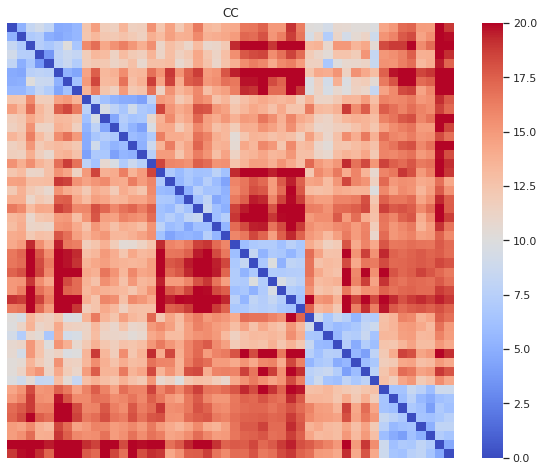

In [20]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CC")
plt.savefig('cc6subhm.svg')


In [ ]:
# print(len(inter_dist[:1585]), len(intra_dist))
import scipy.stats as stats
stats.ttest_ind(a=inter_dist,b=intra_dist,equal_var=False)

In [11]:
# print(len(dist_hm))
for i in range(len(dist_hm)):
    if len(dist_hm[i]) != 200:
        print(i,len(dist_hm[i]))
# print(dist_hm[])
    

8 0
17 0
26 0
35 0
44 0
53 0
59 0
63 0
80 0
85 0
98 0
106 0
116 0
125 0
134 0
143 0
152 0
161 0
170 0
172 0
188 0
192 0
206 0
215 0
224 0


200


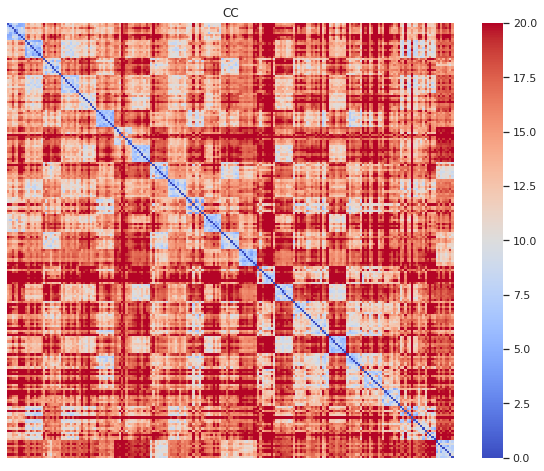

In [14]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==200
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CC")
plt.savefig('cc25subhm.svg')


In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==127
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist)
plt.savefig('cc16subhm.svg')

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(25,20)})
dist = [i for i in dist_hm if len(i)==128]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
# plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(25,20)})
dist = [i for i in dist_hm if len(i)==152]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
# plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.savefig('cc6subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==120]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "icefire")

In [ ]:
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# li = set(del_list)
# print(li)
li =  [3,5,6,14,19,21,22]
sub_list = [sub_list[i] for i in range(25) if i not in li]
print(sub_list)
# 2,3,4,5,6,8,9,12
sub_list = [ '2027j', '3978i', '3058s', '1145h', '4917f', '4961a']

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))

import seaborn as sns
# sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(dist,cmap = "viridis")


In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
sns.set(rc = {'figure.figsize':(8,8)})
dist = [i for i in dist_hm[:6] if len(i)==88]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
#importance of node score
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes()) # throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 10
dist_hm = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subi])+"_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H1, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H1, node_loc)
                        annotate_graph(H1, node_loc)
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subj])+"_ses-"+str(j)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H2, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H2, node_loc)
                        annotate_graph(H2, node_loc)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn)
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        dist_sub.append(dist)
                        print(subi,i,subj,j,dist)
                    except:
                        pass
            dist_hm.append(dist_sub)

    

    

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist,cmap = "coolwarm")

In [ ]:
#importance of node score
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score # throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 10
dist_hm = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subi])+"_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H1, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H1, node_loc)
                        annotate_graph(H1, node_loc)
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subj])+"_ses-"+str(j)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H2, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H2, node_loc)
                        annotate_graph(H2, node_loc)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn)
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        dist_sub.append(dist)
                        print(subi,i,subj,j,dist)
                    except:
                        pass
            dist_hm.append(dist_sub)

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)